<a href="https://colab.research.google.com/github/JPLAVALLEY/kaggle/blob/master/Housing_Prices_Model_Ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jplavalley","key":"6b3c042d9370b332481115da40efebc2"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 49.3MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 54.5MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.3MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 27.2MB/s]


# COMPONENTS OF THIS PROJECT

### 1- EXPLORATORY DATA ANALYSIS

### 2- DATA CLEANING

### 3- FEATURE ENGINEERING

### 4- ENCODING CATEGORICAL FEATURES

### 5- DETECTING OUTLIERS

### 6- MACHINE LEARNING

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

We open our train and test datasets

In [0]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')

In [0]:
#Use this code to show all the 163 columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Here is a glimpse of what we will be dealing with:

Many features, many missing values and one target feature: "SalePrice" which is the price of the houses we are supposed to predict

In [11]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
print('The shape of our training set: ',a.shape[0], 'houses', 'and', a.shape[1], 'features')
print('The shape of our testing set: ',b.shape[0], 'houses', 'and', b.shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our training set:  1460 houses and 81 features
The shape of our testing set:  1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


# Exploratory data analysis

Let's have a look first at the correlation between numerical features and the target "SalePrice", in order to have a first idea of the connections between features. Just by looking at the heatmap below we can see many light colors, many features have high correlation with the target.

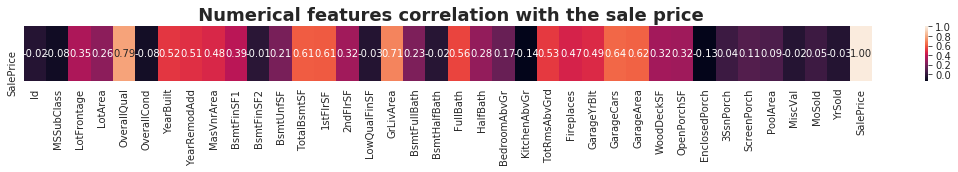

In [13]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(19,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1),annot=True, fmt = ".2f")
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.show()


To have a better idea, we sort the features according to their correlation with the sale price

In [15]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Interesting! The overall quality, the living area, basement area, garage cars and garage area have the highest correlation values with the sale price, which is logical, better quality and bigger area = Higher price.
* Also some features such as, full bath or 1st floor surface have a higher correlation, those are luxury features, more luxury = Higher price.
* and Year built, the newer buildings seem to have higher sale prices.

Let's dig in more into the data, those are just the numerical features. I assume that categorical features will be very important, for example, the neighborhood feature will be important, maybe the most important, given that good locations nowadays cost good money.

* But before going any futher, we start by cleaning the data from missing values

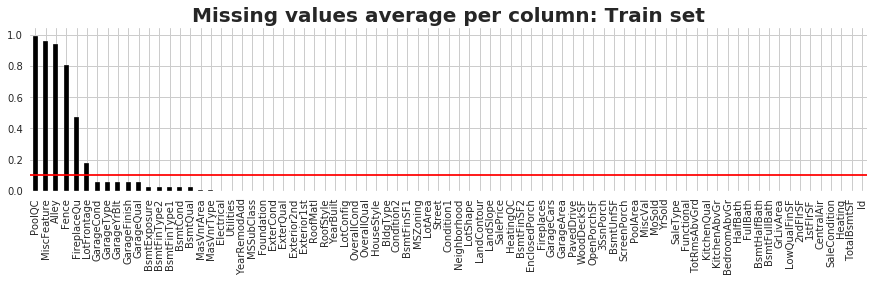

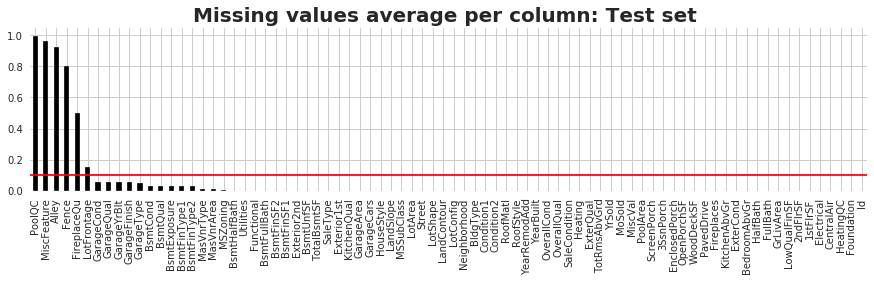

In [16]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0,figsize=(15,3))


a.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column: Train set', fontsize=20, weight='bold' )
plt.show()

plt.subplots(1,0,figsize=(15,3))
b.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column: Test set ', fontsize=20, weight='bold' )
plt.show()

* Good news! Most of the features are clean from missing values

* We combine first the train and test datasets to run all the data munging and feature engineering on both of them.

In [17]:
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()
#Combine train and test sets
c1 = pd.concat((a, b), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print("Total size is :",c1.shape)

Total size is : (2919, 79)


# Data cleaning

* First thing to do is get rid of the features with more than 90% missing values. For example the PoolQC's missing values are probably due to the lack of pools in some buildings, which is very logical. But replacing those (more than 90%) missing values with "no pool" will leave us with a feature with low variance, and low variance features are uniformative for machine learning models. So we drop the features with more than 90% missing values.

In [18]:
c=c1.dropna(thresh=len(c1)*0.9, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

We dropped  6  features in the combined set


Before cleaning the data, we zoom at the features with missing values, those missing values won't be treated iqually. Some features have barely 1 or 2 missing values, we will use the forward fill method to fill them.

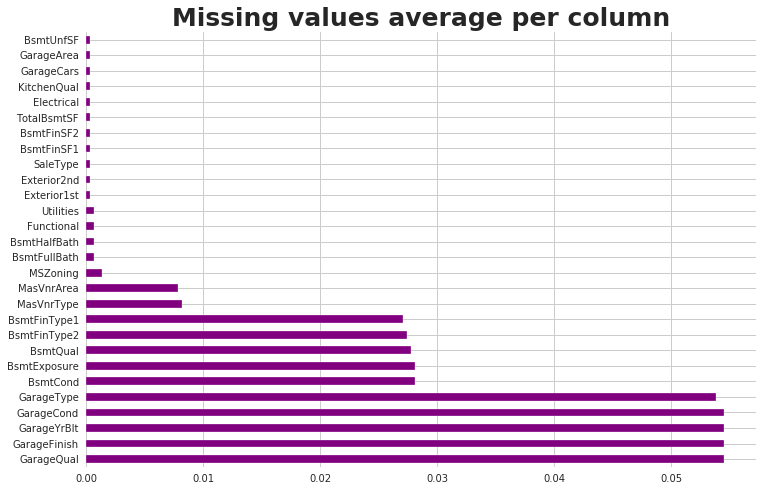

In [19]:
allna = (c.isnull().sum() / len(c))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()

In [20]:
print('The shape of the combined dataset after dropping features with more than 90% M.V.', c.shape)

The shape of the combined dataset after dropping features with more than 90% M.V. (2919, 73)


We isolate the missing values from the rest of the dataset to have a good idea of how to treat them

In [0]:
NA=c[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', \
      'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities',\
      'Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

We split them to:
* Categorical features
* Numerical features

In [23]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 18 categorical features with missing values
We have : 10 numerical features with missing values


So, 18 categorical features and 10 numerical features to clean.
* We start with the numerical features, first thing to do is have a look at them to learn more about their distribution and decide how to clean them:
- Most of the features are going to be filled with 0s because we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.
- GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1980).

In [24]:
NAnum.head()

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [0]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)
#For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
#We will fill with 0s because they just mean that the hosue doesn't have a basement, bathrooms or a garage

And we have 18 Categorical features with missing values:
* Some features have just 1 or 2 missing values, so we will just use the forward fill method because they are obviously values that can't be filled with 'None's
* Features with many missing values are mostly basement and garage related (same as in numerical features) so as we did with numerical features (filling them with 0s), we will fill the categorical missing values with "None"s assuming that the houses lack basements and garages.

In [27]:
NAcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


In [28]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [0]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')

* We dealt already with small missing values or values that can't be filled with "0" such as Garage year built.
* The rest of the features are mostly basement and garage related with 100s of missing values, we will just fill 0s in the numerical features and 'None' in categorical features, assuming that the houses don't have basements, full bathrooms or garage.

In [0]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [0]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [32]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
TotalBsmtSF      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

We finally end up with a clean dataset, next thing to do is create new features

# Feature engineering:

Since the area is a very important variable, we will create a new feature "TotalArea" that sums the area of all the floors and the basement.

In [0]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea']

Feature engineering is very important to improve the model's performance, I will start in this kernel just with the TotalArea feature and will keep updating the kernel by creating new features.
* ** This part of the kernel is not finished yet.**

# Encoding categorical features

In [34]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (2919, 74)
the shape of the encoded dataset (2919, 279)
We have  205 new encoded features


In [0]:
#log transform skewed numeric features:
from scipy.stats import skew

numeric_feats = c.dtypes[c.dtypes != "object"].index

skewed_feats = c[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

c[skewed_feats] = np.log1p(c[skewed_feats])

We are done with the cleaning and feature engineering. Now, we split the combined dataset to the original train and test sets

In [0]:
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 

# Detecting outliers

This part of the kernel will be a little bit messy. I didn't want to deal with the outliers in the combined dataset to keep the shape of the original train and test datasets. Dropping them would shift the location of the rows.
* If you know a better solution to this, I will be more than happy to read your recommandations.

* OK. So we go back to our original train dataset to visualize the important features / Sale price scatter plot to find outliers

Text(0.5, 1.0, 'Masonry veneer Area - Price scatter plot')

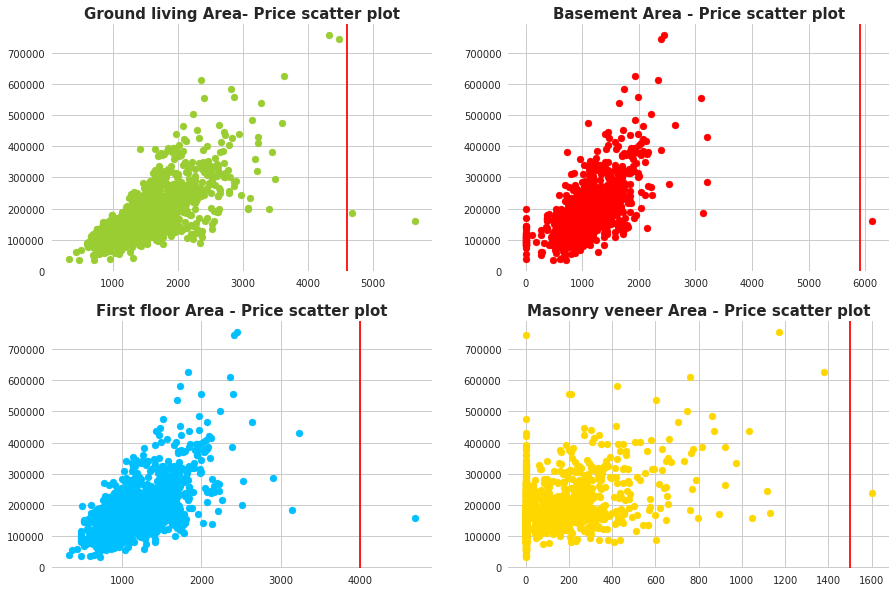

In [37]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'))
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'))
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'))
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'))
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

The outliers are the points in the right that have a larger area but a very low sale price. We localize those points by sorting their respective columns

* Interesting! The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: **The outlier with index number 1298. **
* We detect the outlier 297 in MasVnrArea.

In [38]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [39]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [40]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [41]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

We can safely remove those 3 points.

In [42]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


We do the same thing with "SalePrice" column, we localize those  rows 1298 and 523 and make sure they are the right outliers to remove. 
* They both have the same price range as the detected outliers. So, we just drop them.

In [43]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [44]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [0]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

In [46]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


Text(0.5, 1.0, 'Area-Price plot without outliers')

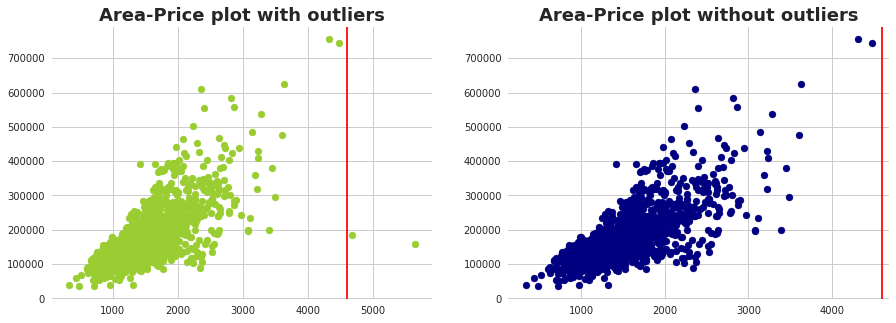

In [47]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'))
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy')
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)

#### Log tranform the target because it's skewed to the right

In [0]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

Text(0.5, 1.0, 'Sale price distribution after normalization')

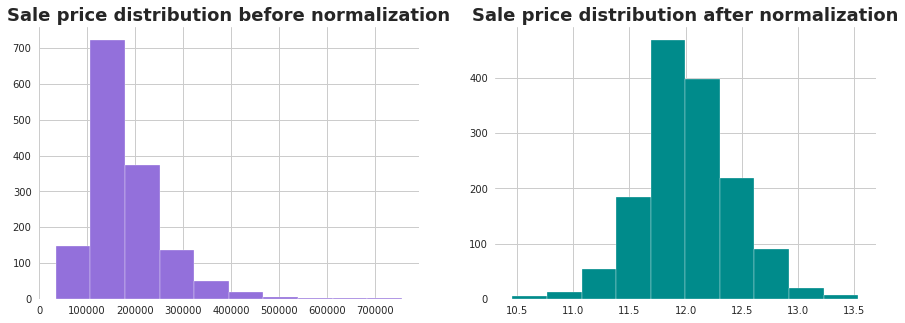

In [49]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple')
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan')
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)

# Machine Learning

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

## Preprocessing

We start machine learning by setting the features and target:
* Features: x
* Target: y

In [0]:
x=train
y=np.array(target)

Then, we split them to train and test sets

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .33, random_state=0)

We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there, I will try to find them in future versions of the kernel

In [0]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

We first start by trying the very basic regression model: Linear regression. 
* We use 5- Fold cross validation for a better error estimate:


In [54]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-17480796.404625677
RMSE = 4181.004233988011


We get an **RMSE=0.125.**
* Our goal is to minimize the error, we use regularization methods: Ridge, Lasso and ElasticNet, in order to lower the squared error

## Regularization: 

> ## Ridge regression:
* Minimize squared error + a term **alpha** that penalizes the error
* We need to find a value of **alpha** that minimizes the train and test error (avoid overfitting)

In [55]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x,y)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 14}
The best score achieved with Alpha=14 is:  -0.013041933126555329


In [56]:
ridge_mod=Ridge(alpha=14)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.0946403632965905
Root Mean Square Error test = 0.11515590585841573


Good! Ridge regression minimized the error. Ridge's **RMSE= 0.115**
* Next we try Lasso regularization: Similar procedure as ridge regularization but Lasso tends to have a lot of 0 entries in it and just few nonzeros (easy selection). In other words, lasso drops the uninformative features and keeps just the important ones.
* As with Ridge regularization, we need to find the **alpha** parameter that penalizes the error

> ## Lasso regression

In [57]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x,y)

print('The best value of Alpha is: ',lasso_reg.best_params_)
print('The best score achieved with Alpha=0.001 is: ',math.sqrt(-lasso_reg.best_score_))

The best value of Alpha is:  {'alpha': 0.001}
The best score achieved with Alpha=0.001 is:  0.11370955895588558


I tried numbers that round our best Alpha=0.001 and found out that 0.009 gives a better result, so we continue with **Alpha=0.009**

In [58]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.10045178977303422
Root Mean Square Error test = 0.11207022047587373


With Lasso regularization, we achieved a better score. We minimized the error: **RMSE= 0.1120**
* We check next, the important features that our model used to make predictions
* The number of uninformative features that were dropped

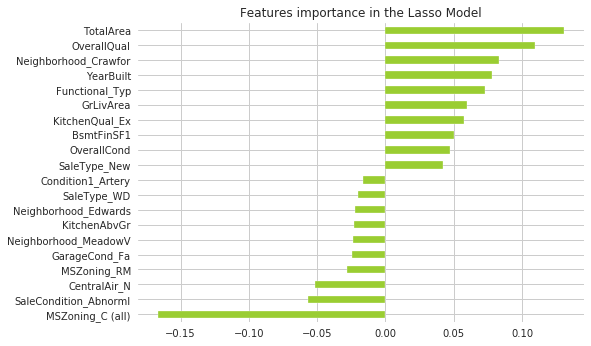

In [59]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.title("Features importance in the Lasso Model")
plt.show()

Nice! The most important feature is the new feature we created "**TotalArea**". 
* Other features such as neighborhood or overall quality are among the main important features.

In [60]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  89 important features and dropped the other  190  features


Next, we try ElasticNet. A regressor that combines both ridge and Lasso.
We use cross validation to find:
* Alpha
* Ratio between Ridge and Lasso, for a better combination of both

> ## ElasticNet

In [61]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.001, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 1,10]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))

Root Mean Square Error test = 0.11406867015625728


ElasticNet gives a higher error score than Lasso with **RMSE=0.114**. But we will definitely use it later in stacking and averaging.

We will try other kind of regressors, such as XGBRegressor and ExtraTreesRegressor

In [0]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[3460],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.001,0.0001]}
#
#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

The gridSearch above tunes the hyperparamaters, but it takes forever to run. I copy the best estimator results to the model below. Feel free to uncomment and check it out.

In [63]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=3460,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.11706447067107628


* XGB score **RMSE= 0.117**
* Worst than Ridge and Lasso but we will use is in stacking regressors

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
ex_reg=ExtraTreesRegressor(n_estimators=2000, max_depth=20)

ex_mod=ex_reg.fit(x_train,y_train.ravel())
ex_pred=ex_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ex_pred))))

Root Mean Square Error test = 0.13587681560072565


ExtraTrees gave the worst score because I didn't tune the parameters, I will try to tune them in future versions and see if we can use it in stacking and averaging. For now, we discard it.

### VOTING REGRESSOR:
* A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.

* After running the regressors, we combine them first with voting regressor in order to get a better model

In [65]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.11017592167716057


**NICE!! This is the best RMSE score so far. RMSE=0.1101**

### STACKING REGRESSOR:

We stack all the previous models, including the votingregressor as the meta regressor:

In [66]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod], 
                           meta_regressor=vote_mod, use_features_in_secondary=True)

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.1118178308752365


The RMSE score is good but not as good as VotingRegressor, we will average both of them for a stronger model.
* Last thing to do is fit our regressors on the testing dataset and then average them

In [0]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

I will create 2 csv files and test which one gives better results:
* 1: The VotingRegressor prediction (since it gave the best score)
* 2: The average prediction of the Voting/Stacking/Lasso (Averaging models tends to lower the error rates)
- We will submit both results and see which one gives the best LB score: **Voting** or **Averaging**.

In [0]:
#Submission of the results predicted by VotingRegressor
vote_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final1
    })
vote_submission.to_csv("sample_submission.csv", index=False)

Averaging the stacking, voting and lasso models

In [69]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(final1+final2+final3)/3

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
final_submission.to_csv("sample_submission2.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,116077.365346
1,1462,150919.926657
2,1463,178796.477833
3,1464,197097.455248
4,1465,186662.114661


 **Finally**, after submitting both csv files, the VotingRegressor alone gave a better score 0.1164. 
 * The Voting regressor fits base regularization regressors: Ridge, Lasso and ElasticNet, each on the whole dataset. It, then, averages the individual predictions to form a final prediction.

## If you made it this far, thank you for your attention.
 **In order to improve my LB score, I will keep updating this kernel by:**
* **Creating new features**
* **Detecting other outliers**
* **Trying new regressors and stacking/blending them**

In [70]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f sample_submission2.csv -m "Message"

100% 33.6k/33.6k [00:02<00:00, 15.1kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques